In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import yaml

import sys
sys.path.append('../')
import SRT_optimization as srt

In [2]:
magn_field_MHz=850 # for values in MHz
x=np.logspace((-20),(-3),200) # set of timescales used for optimization
x2=np.logspace((-12),(-7),100) # set of timescales for which the extremes are searched for

gammaH=267.513*10**6;
gammaN=-27.166*10**6;

magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6

In [3]:
# data is saved in the form [[effTimes],[R1],[R2],[hetNOE]]
magn_field_MHz=850


save_labels=["small_peptides",
       "peptides_SDSmicelles",
       "Calmodulin",
       "CDNF",
       "EN2",
       "musMANF",
       "TonB"]

systems={}
for system in save_labels:
    systems[system]=np.loadtxt("simulation_SRT_vs_effTime/"+system+"_"+str(magn_field_MHz)+".dat")
    

# data is saved in the form [[effTimes,effTime[-1:0]],[R1limits_min,R1limits_max[-1:0]]]
# resp [[effTimes,effTime[-1:0]],[R2limits_min,R1limits_max[-1:0]]] - the data

limits={}
limits["R1"]=np.loadtxt("extremes_of_Redfield/R1_limits_"+str(magn_field_MHz)+".dat")
limits["R2"]=np.loadtxt("extremes_of_Redfield/R2_limits_"+str(magn_field_MHz)+".dat")


# data is saved as [[effTimes],[R1]], [[effTimes],[R2]], [[effTimes],[hetNOE]] 

oneTime={}
oneTime["R1"]=np.loadtxt("1timescale_data/R1_1timescale_"+str(magn_field_MHz)+".dat")
oneTime["R2"]=np.loadtxt("1timescale_data/R2_1timescale_"+str(magn_field_MHz)+".dat")
oneTime["hetNOE"]=np.loadtxt("1timescale_data/hetNOE_1timescale_"+str(magn_field_MHz)+".dat")

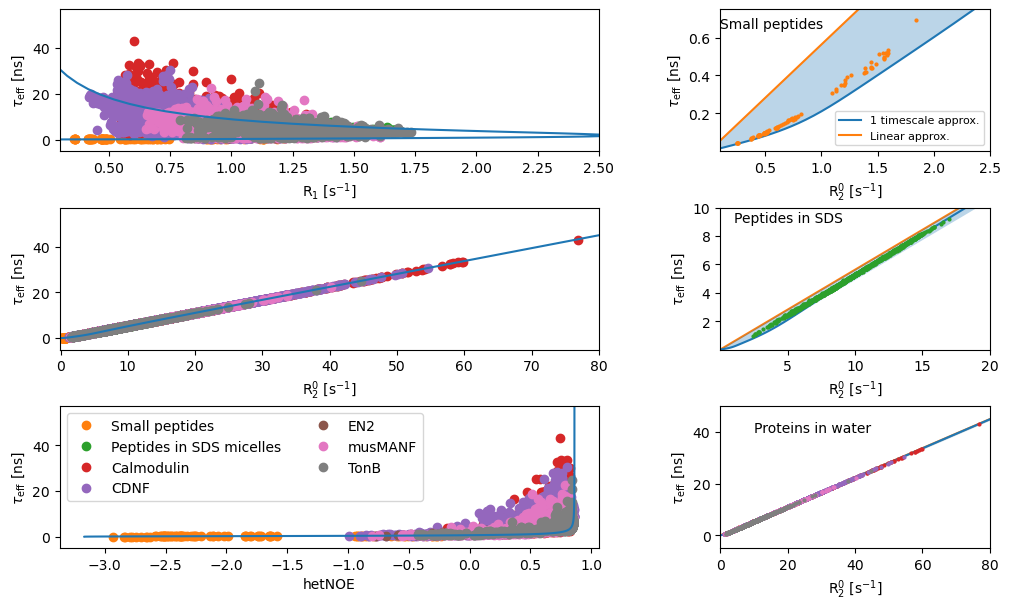

In [9]:
fig = plt.figure(figsize=(12,7))
ax={}
outer = gridspec.GridSpec(1,2, width_ratios=[2,1], wspace=0.3)
for i in range(2):
    inner1 = gridspec.GridSpecFromSubplotSpec(3,1, hspace=0.4, subplot_spec=outer[i])
    for j in range(3):
        ax[i,j] = plt.Subplot(fig, inner1[j])
        fig.add_subplot(ax[i,j])
        
        
labels=["Small peptides",
       "Peptides in SDS micelles",
       "Calmodulin",
       "CDNF",
       "EN2",
       "musMANF",
       "TonB"]


for i,system in enumerate(systems):    
    ax[0,0].plot(systems[system][1],systems[system][0],"o",c="C"+str(1+i))
    ax[0,1].plot(systems[system][2],systems[system][0],"o",c="C"+str(1+i))
    ax[0,2].plot(systems[system][3],systems[system][0],"o",c="C"+str(1+i),label=labels[i])

                

                        

ax[0,0].plot(oneTime["R1"][1],oneTime["R1"][0]*10**9,"-")
#ax[0,0].fill(limits["R1"][1], limits["R1"][0]*10**9,  alpha=0.3)
ax[0,1].plot(oneTime["R2"][1],oneTime["R2"][0]*10**9,"-")
#ax[0,1].fill(limits["R2"][1], limits["R2"][0]*10**9,  alpha=0.3)
ax[0,2].plot(oneTime["hetNOE"][1],oneTime["hetNOE"][0]*10**9,"-")


ax[0,0].set_xlabel("R$_1$ [s$^{-1}$]")
ax[0,1].set_xlabel("R$_2^0$ [s$^{-1}$]")
ax[0,2].set_xlabel("hetNOE")                        
ax[0,0].set_ylabel(r"$\tau_{\mathrm{eff}}$ [ns]")
ax[0,1].set_ylabel(r"$\tau_{\mathrm{eff}}$ [ns]")
ax[0,2].set_ylabel(r"$\tau_{\mathrm{eff}}$ [ns]")


ax[0,0].set_xlim(0.3,2.5)
ax[0,0].set_ylim(-5,57)
ax[0,1].set_xlim(-0.1,80)
ax[0,1].set_ylim(-5,57)
ax[0,2].set_ylim(-5,57)

ax[0,2].legend(loc=2,ncol=2)


#################################


all_x=[]
all_y=[]

for sys in systems:
    all_x+=list(systems[sys][2])
    all_y+=list(systems[sys][0])

fit=np.polyfit(all_x,all_y,1)

# Ensin lasketaan ennustetut arvot suoralle
sorted_x=sorted(all_x)
y_predicted = fit[0] * np.array(all_x) + fit[1]
sorted_y = fit[0] * np.array(sorted_x) + fit[1]


x2=np.logspace((-12),(-7),100)
ax[1,0].plot(oneTime["R2"][1],oneTime["R2"][0]*10**9,"-",label="1 timescale approx.")
ax[1,1].plot(oneTime["R2"][1],oneTime["R2"][0]*10**9,"-")
ax[1,2].plot(oneTime["R2"][1],oneTime["R2"][0]*10**9,"-")


ax[1,0].fill(limits["R2"][1], limits["R2"][0]*10**9,  alpha=0.3)
ax[1,1].fill(limits["R2"][1], limits["R2"][0]*10**9,  alpha=0.3)
ax[1,2].fill(limits["R2"][1], limits["R2"][0]*10**9,  alpha=0.3)


ax[1,0].set_xlim(0.1,2.5)
ax[1,0].set_ylim(10**(-3),0.00075*10**(3))

ax[1,1].set_xlim(0.001,20)
ax[1,1].set_ylim(10**(-3),0.010*10**(3))


ax[1,2].set_xlim(-0.01,80)
ax[1,2].set_ylim(-5,0.050*10**(3))

#plt.suptitle(str(magn_field_MHz)+" MHz")

    

ax[1,0].plot(systems["small_peptides"][2],systems["small_peptides"][0],"o",c="C1", markersize=2)

ax[1,1].plot(systems["peptides_SDSmicelles"][2],systems["peptides_SDSmicelles"][0],"o",c="C2", markersize=2)
        
amanda=["Calmodulin",
       "CDNF",
       "EN2",
       "musMANF",
       "TonB"]
    
for i, system in enumerate(amanda):
    ax[1,2].plot(systems[system][2],systems[system][0],"o",c="C"+str(3+i), markersize=2)
  


ax[1,0].set_ylabel(r"$\tau_{\mathrm{eff}}$ [ns]")
ax[1,1].set_ylabel(r"$\tau_{\mathrm{eff}}$ [ns]")
ax[1,2].set_ylabel(r"$\tau_{\mathrm{eff}}$ [ns]")



ax[1,0].set_xlabel("R$_2^0$ [s$^{-1}$]")
ax[1,1].set_xlabel("R$_2^0$ [s$^{-1}$]")
ax[1,2].set_xlabel("R$_2^0$ [s$^{-1}$]")

ax[1,0].text(0.1,0.65,"Small peptides")
ax[1,1].text(1,9,"Peptides in SDS")
ax[1,2].text(10,40,"Proteins in water")

wh = gammaH * magnetic_field 
wn = gammaN * magnetic_field 

T1, T2, NOE, x = srt.getSRT(-20,-3,200,magnetic_field)

mu = 4 * np.pi * 10**(-7) #magnetic constant of vacuum permeability
h_planck = 1.055 * 10**(-34); #reduced Planck constant
rN = 0.101 * 10**(-9); # average cubic length of N-H bond
d = 1 * (mu * gammaN * gammaH * h_planck) / (4 * np.pi * rN**3); # dipolar coupling constant

K1=(d**2 / 20)
K2=(wn * 160 * 10**(-6))**2 / 45


eff_from_R2_approx=1/((4*K1+4*K2)*T2)*10**9



ax[1,0].plot(1/T2,eff_from_R2_approx,label="Linear approx.")
ax[1,1].plot(1/T2,eff_from_R2_approx,zorder=0)
ax[1,2].plot(1/T2,eff_from_R2_approx,zorder=0)


ax[1,0].legend(prop={"size":8})


plt.savefig('figure1_SRT_vs_eff_tim_ver1.pdf')

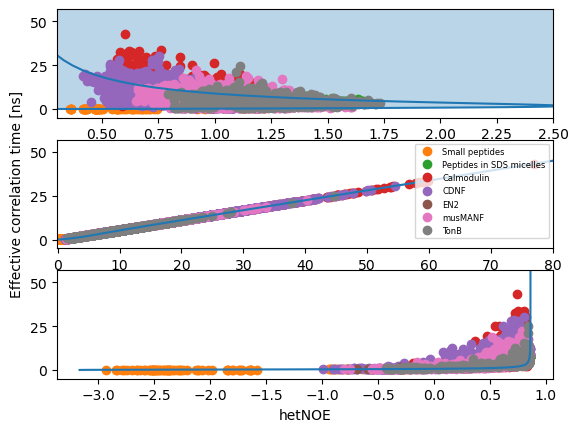

In [4]:



fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=False)


labels=["Small peptides",
       "Peptides in SDS micelles",
       "Calmodulin",
       "CDNF",
       "EN2",
       "musMANF",
       "TonB"]


for i,system in enumerate(systems):    
    ax1.plot(systems[system][1],systems[system][0],"o",c="C"+str(1+i))
    ax2.plot(systems[system][2],systems[system][0],"o",c="C"+str(1+i),label=labels[i])
    ax3.plot(systems[system][3],systems[system][0],"o",c="C"+str(1+i))

                

                        

ax1.plot(oneTime["R1"][1],oneTime["R1"][0]*10**9,"-")
ax1.fill(limits["R1"][1], limits["R1"][0]*10**9,  alpha=0.3)
ax2.plot(oneTime["R2"][1],oneTime["R2"][0]*10**9,"-")
ax2.fill(limits["R2"][1], limits["R2"][0]*10**9,  alpha=0.3)
ax3.plot(oneTime["hetNOE"][1],oneTime["hetNOE"][0]*10**9,"-")


ax1.set_xlabel("R1 [s]")
ax2.set_xlabel("R2 [s]")
ax3.set_xlabel("hetNOE")                        
ax2.set_ylabel("Effective correlation time [ns]")


ax1.set_xlim(0.3,2.5)
ax1.set_ylim(-5,57)
ax2.set_xlim(-0.1,80)
ax2.set_ylim(-5,57)
ax3.set_ylim(-5,57)

ax2.legend(loc=1,prop={"size":6})

#ax1.set_title(str(magn_field_MHz)+" MHZ")

#plt.savefig("eff_time_vs_SRT_main_R2_"+str(magn_field_MHz)+"_2.pdf")